# 2023 Data Analysis

In [1]:
import seaborn as sns
sns.set()
sns.set_palette("Dark2")

# automatically reload utils module when it changes
%load_ext autoreload
%autoreload 2

# import utility functions
import sys
sys.path.append('../')
from src.utils import *

# set plotting defaults
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300
import matplotlib.pyplot as plt

# requires version 0.12.0 or higher
sns.__version__

'0.12.2'

In [2]:
def mad(x):
    return np.median(np.abs(x - np.median(x)))

In [3]:
# load the 2023 data
df = get_data(2023)

Breakdown by Outlier Condition:
	Outlier Rents ($0): 5424 (92%)
	Outlier Rents (other): 37 ( 1%)
	Outlier Increase vs Base: 608 (10%)
	Outlier Increase vs Previous: 328 ( 6%)
	Overall: 5905 (100%)

Breakdown by Subset:
	5905 outliers (33%)
	12081 non-outliers (67%)


	8567 rent increase (48%)
	9419 no rent increase (52%)


	7146 exempt (40%)
	10840 not exempt (60%)


In [4]:
# exempt vs outlier
tab = pd.crosstab(
    df["exempt"],
    df["outlier"],
    margins=True
)
tab.index = ["Covered", "Exempt", "All"]
tab.columns = ["Not Outlier", "Outlier", "All"]
tab

,Not Outlier,Outlier,All
Covered,10007,833,10840
Exempt,2074,5072,7146
All,12081,5905,17986


# Population Statistics

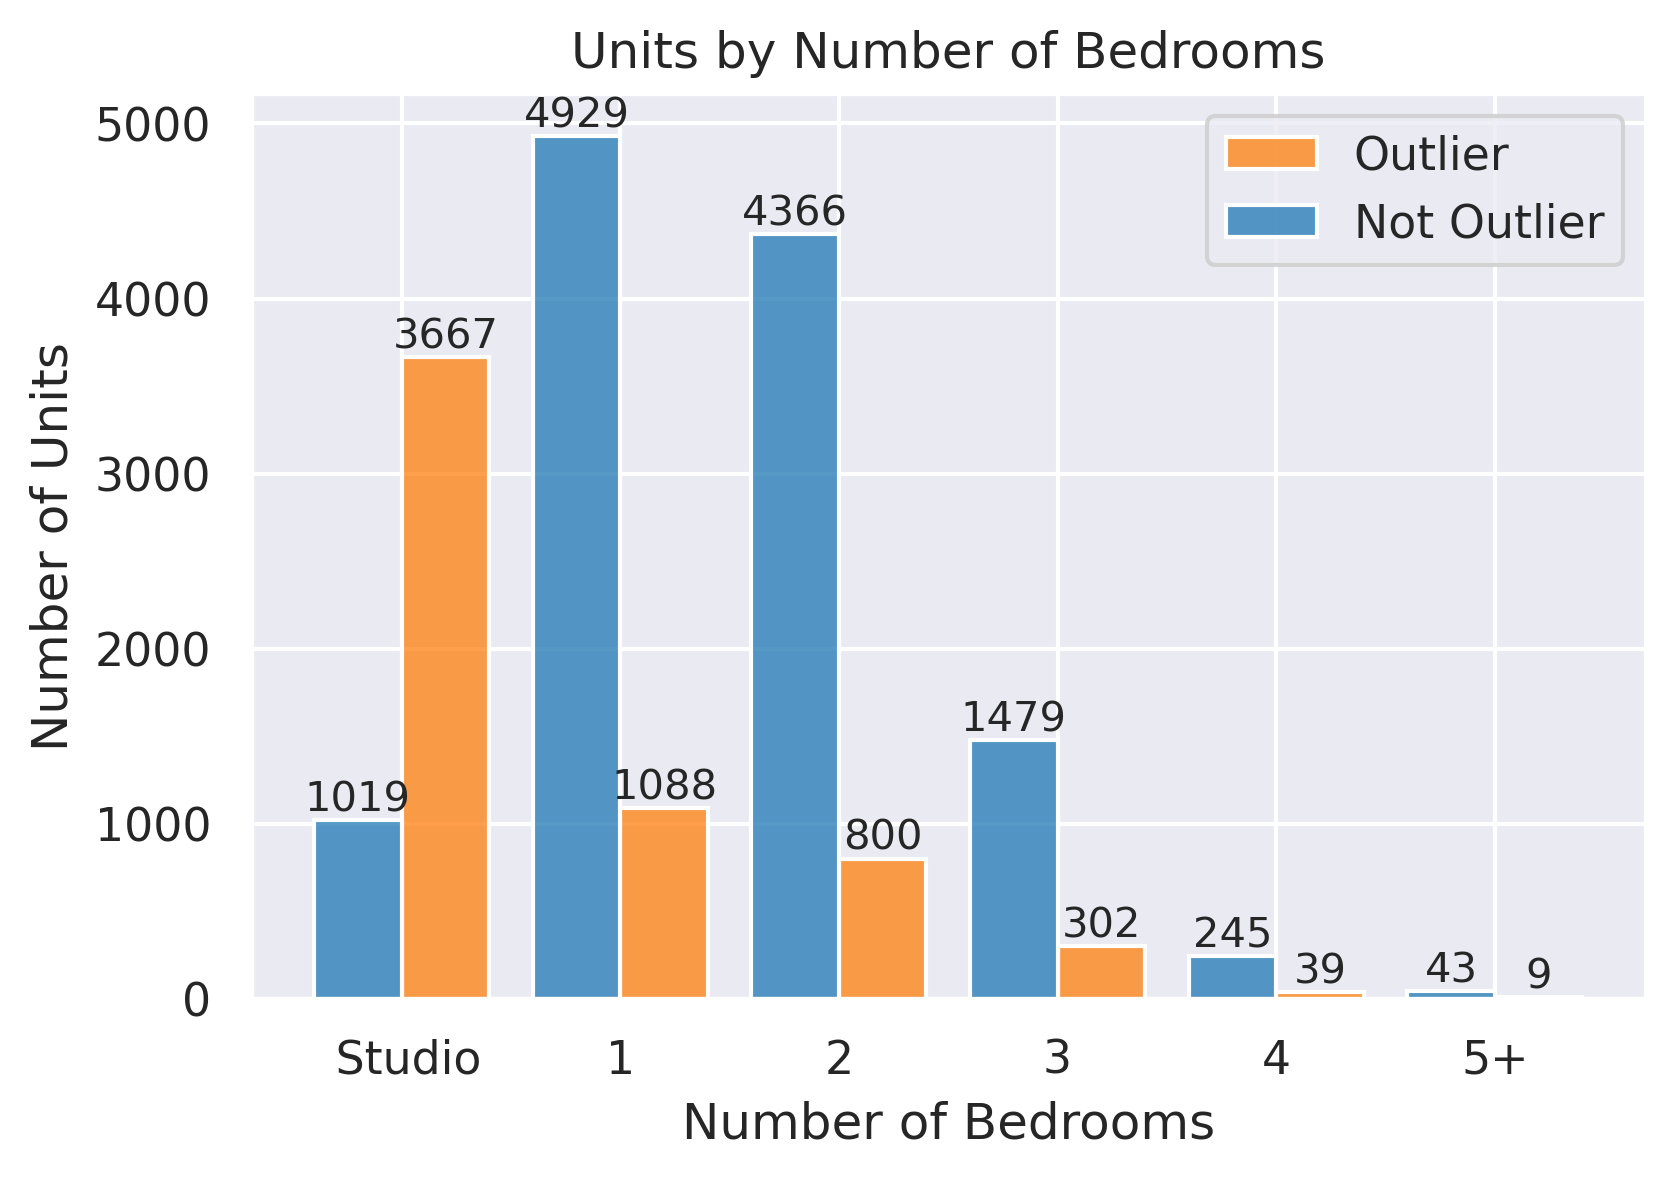

In [5]:
ax = sns.histplot(
    data=df.sort_values("nbrBedRms_grouped"),
    x='nbrBedRms_grouped',
    hue='outlier',
    multiple='dodge',
    palette='tab10',
    shrink=0.8,
    )
# add labels
for bars in ax.containers:
    ax.bar_label(
        bars,
        fmt='%d',
        label_type='edge'
        )
ax.set_title("Units by Number of Bedrooms")
ax.set_xlabel("Number of Bedrooms")
ax.set_ylabel("Number of Units")
ax.legend(labels=['Outlier', 'Not Outlier'])

In [6]:
# outlier counts by number of bedrooms
tab = pd.crosstab(
    df['nbrBedRms_grouped'],
    df['outlier'],
    margins=True,
    margins_name='Total'
    )
tab.columns = ['Not Outlier', 'Outlier', 'Total']
tab.index.name = 'Number of Bedrooms'
tab

,Not Outlier,Outlier,Total
Number of Bedrooms,,,
Studio,1019,3667,4686
1,4929,1088,6017
2,4366,800,5166
3,1479,302,1781
4,245,39,284
5+,43,9,52
Total,12081,5905,17986


## Essential Statistics

These are statistics requested by the Press Herald.

In [7]:
# essential statistics
median_rent = df[~df["outlier"]]['CurrentRent1'].median()
mean_rent_inc = df[~df["outlier"]]['Rent_Inc'].mean()
mean_rent_inc_percent = df[~df["outlier"]]['Rent_Inc_percent'].mean()
median_1br_rent = df[~df["outlier"]][df['nbrBedRms_studio'] == 1]['CurrentRent1'].median()
mean_1br_rent_inc = df[~df["outlier"]][df['nbrBedRms_studio'] == 1]['Rent_Inc'].mean()
mean_1br_rent_inc_percent = df[~df["outlier"]][df['nbrBedRms_studio'] == 1]['Rent_Inc_percent'].mean()

print(f"Median rent: ${median_rent:,.0f}")
print(f"Mean rent increase: ${mean_rent_inc:.0f} ({mean_rent_inc_percent:.1f}%)")
print(f"Median 1BR (plus studios) rent: ${median_1br_rent:,.0f}")
print(f"Mean 1BR (plus studios) rent increase: ${mean_1br_rent_inc:.0f} ({mean_1br_rent_inc_percent:.1f}%)")

Median rent: $1,465
Mean rent increase: $149 (4.9%)
Median 1BR (plus studios) rent: $1,258
Mean 1BR (plus studios) rent increase: $127 (5.4%)


/tmp/ipykernel_4270/3023863665.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  median_1br_rent = df[~df["outlier"]][df['nbrBedRms_studio'] == 1]['CurrentRent1'].median()
/tmp/ipykernel_4270/3023863665.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mean_1br_rent_inc = df[~df["outlier"]][df['nbrBedRms_studio'] == 1]['Rent_Inc'].mean()
/tmp/ipykernel_4270/3023863665.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mean_1br_rent_inc_percent = df[~df["outlier"]][df['nbrBedRms_studio'] == 1]['Rent_Inc_percent'].mean()


In [8]:
median_rent_by_exempt = df[~df["outlier"]].groupby('exempt').median()['CurrentRent1']
mean_rent_inc_by_exempt = df[~df["outlier"]].groupby('exempt').mean()['Rent_Inc']
mean_rent_inc_percent_by_exempt = df[~df["outlier"]].groupby('exempt').mean()['Rent_Inc_percent']
median_1br_rent_by_exempt = df[~df["outlier"]][df['nbrBedRms_studio'] == 1].groupby('exempt').median()['CurrentRent1']
mean_1br_rent_inc_by_exempt = df[~df["outlier"]][df['nbrBedRms_studio'] == 1].groupby('exempt').mean()['Rent_Inc']
mean_1br_rent_inc_percent_by_exempt = df[~df["outlier"]][df['nbrBedRms_studio'] == 1].groupby('exempt').mean()['Rent_Inc_percent']

print(f"Median rent by exempt: ${median_rent_by_exempt[1]:,.0f} (exempt) vs. ${median_rent_by_exempt[0]:,.0f} (not exempt)")
print(f"Mean rent increase by exempt: ${mean_rent_inc_by_exempt[1]:.0f} ({mean_rent_inc_percent_by_exempt[1]:.1f}%) (exempt) vs. ${mean_rent_inc_by_exempt[0]:.0f} ({mean_rent_inc_percent_by_exempt[0]:.1f}%) (not exempt)")
print(f"Median 1BR (plus studios) rent by exempt: ${median_1br_rent_by_exempt[1]:,.0f} (exempt) vs. ${median_1br_rent_by_exempt[0]:,.0f} (not exempt)")
print(f"Mean 1BR (plus studios) rent increase by exempt: ${mean_1br_rent_inc_by_exempt[1]:.0f} ({mean_1br_rent_inc_percent_by_exempt[1]:.1f}%) (exempt) vs. ${mean_1br_rent_inc_by_exempt[0]:.0f} ({mean_1br_rent_inc_percent_by_exempt[0]:.1f}%) (not exempt)")


/tmp/ipykernel_4270/1866546548.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  median_1br_rent_by_exempt = df[~df["outlier"]][df['nbrBedRms_studio'] == 1].groupby('exempt').median()['CurrentRent1']
/tmp/ipykernel_4270/1866546548.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mean_1br_rent_inc_by_exempt = df[~df["outlier"]][df['nbrBedRms_studio'] == 1].groupby('exempt').mean()['Rent_Inc']


Median rent by exempt: $1,351 (exempt) vs. $1,485 (not exempt)
Mean rent increase by exempt: $140 (3.9%) (exempt) vs. $151 (5.1%) (not exempt)
Median 1BR (plus studios) rent by exempt: $1,137 (exempt) vs. $1,283 (not exempt)
Mean 1BR (plus studios) rent increase by exempt: $114 (4.1%) (exempt) vs. $129 (5.6%) (not exempt)


/tmp/ipykernel_4270/1866546548.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mean_1br_rent_inc_percent_by_exempt = df[~df["outlier"]][df['nbrBedRms_studio'] == 1].groupby('exempt').mean()['Rent_Inc_percent']


In [9]:
# repeat for only units that increased rents
df_inc = df[df['Rent_Inc'] > 0]
median_rent_by_exempt = df_inc[~df_inc["outlier"]].groupby('exempt').median()['CurrentRent1']
mean_rent_inc_by_exempt = df_inc[~df_inc["outlier"]].groupby('exempt').mean()['Rent_Inc']
mean_rent_inc_percent_by_exempt = df_inc[~df_inc["outlier"]].groupby('exempt').mean()['Rent_Inc_percent']
median_1br_rent_by_exempt = df_inc[~df_inc["outlier"]][df_inc['nbrBedRms_studio'] == 1].groupby('exempt').median()['CurrentRent1']
mean_1br_rent_inc_by_exempt = df_inc[~df_inc["outlier"]][df_inc['nbrBedRms_studio'] == 1].groupby('exempt').mean()['Rent_Inc']
mean_1br_rent_inc_percent_by_exempt = df_inc[~df_inc["outlier"]][df_inc['nbrBedRms_studio'] == 1].groupby('exempt').mean()['Rent_Inc_percent']

print(f"Median rent by exempt (only units that increased rent): ${median_rent_by_exempt[1]:,.0f} (exempt) vs. ${median_rent_by_exempt[0]:,.0f} (not exempt)")
print(f"Mean rent increase by exempt (only units that increased rent): ${mean_rent_inc_by_exempt[1]:.0f} ({mean_rent_inc_percent_by_exempt[1]:.1f}%) (exempt) vs. ${mean_rent_inc_by_exempt[0]:.0f} ({mean_rent_inc_percent_by_exempt[0]:.1f}%) (not exempt)")
print(f"Median 1BR (plus studios) rent by exempt (only units that increased rent): ${median_1br_rent_by_exempt[1]:,.0f} (exempt) vs. ${median_1br_rent_by_exempt[0]:,.0f} (not exempt)")
print(f"Mean 1BR (plus studios) rent increase by exempt (only units that increased rent): ${mean_1br_rent_inc_by_exempt[1]:.0f} ({mean_1br_rent_inc_percent_by_exempt[1]:.1f}%) (exempt) vs. ${mean_1br_rent_inc_by_exempt[0]:.0f} ({mean_1br_rent_inc_percent_by_exempt[0]:.1f}%) (not exempt)")


/tmp/ipykernel_4270/3432212235.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  median_1br_rent_by_exempt = df_inc[~df_inc["outlier"]][df_inc['nbrBedRms_studio'] == 1].groupby('exempt').median()['CurrentRent1']


Median rent by exempt (only units that increased rent): $1,385 (exempt) vs. $1,499 (not exempt)
Mean rent increase by exempt (only units that increased rent): $285 (9.0%) (exempt) vs. $209 (7.2%) (not exempt)
Median 1BR (plus studios) rent by exempt (only units that increased rent): $1,138 (exempt) vs. $1,302 (not exempt)
Mean 1BR (plus studios) rent increase by exempt (only units that increased rent): $199 (8.1%) (exempt) vs. $170 (7.5%) (not exempt)


/tmp/ipykernel_4270/3432212235.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mean_1br_rent_inc_by_exempt = df_inc[~df_inc["outlier"]][df_inc['nbrBedRms_studio'] == 1].groupby('exempt').mean()['Rent_Inc']
/tmp/ipykernel_4270/3432212235.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mean_1br_rent_inc_percent_by_exempt = df_inc[~df_inc["outlier"]][df_inc['nbrBedRms_studio'] == 1].groupby('exempt').mean()['Rent_Inc_percent']


In [10]:
# percent of units that increased by exempt
tab = pd.crosstab(
    df[~df["outlier"]]['exempt'],
    df[~df["outlier"]]['Rent_Inc'] > 0,
    normalize='index',
    margins=True,
)
tab.index = ["Covered", "Exempt", "Total"]
tab.columns = ["No Increase", "Increase"]
# convert to percentage
tab = tab * 100
tab.style.format('{:.1f}%')

,No Increase,Increase
Covered,27.4%,72.6%
Exempt,50.4%,49.6%
Total,31.4%,68.6%


/tmp/ipykernel_4270/1264892132.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[~df["outlier"]][df["nbrBedRms1"] == i].hist("CurrentRent1", ax=ax, bins=bins)
/tmp/ipykernel_4270/1264892132.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ax.axvline(df[~df["outlier"]][df["nbrBedRms1"] == i]["CurrentRent1"].median(), linestyle="-", color="k", label="median")
/tmp/ipykernel_4270/1264892132.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ax.axvline(df[~df["outlier"]][df["nbrBedRms1"] == i]["CurrentRent1"].mean(), linestyle="-", color="r", label="mean")
/tmp/ipykernel_4270/1264892132.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ax.axvline(df[~df["outlier"]][df["nbrBedRms1"] == i]["CurrentRent1"].mean() + df[~df["outlier"]][df["nbrBedRms1"] == i]["CurrentRent1"].std(), linestyle="--", color="k", label="std")
/tmp/ipykernel_4270/1264892132.py:

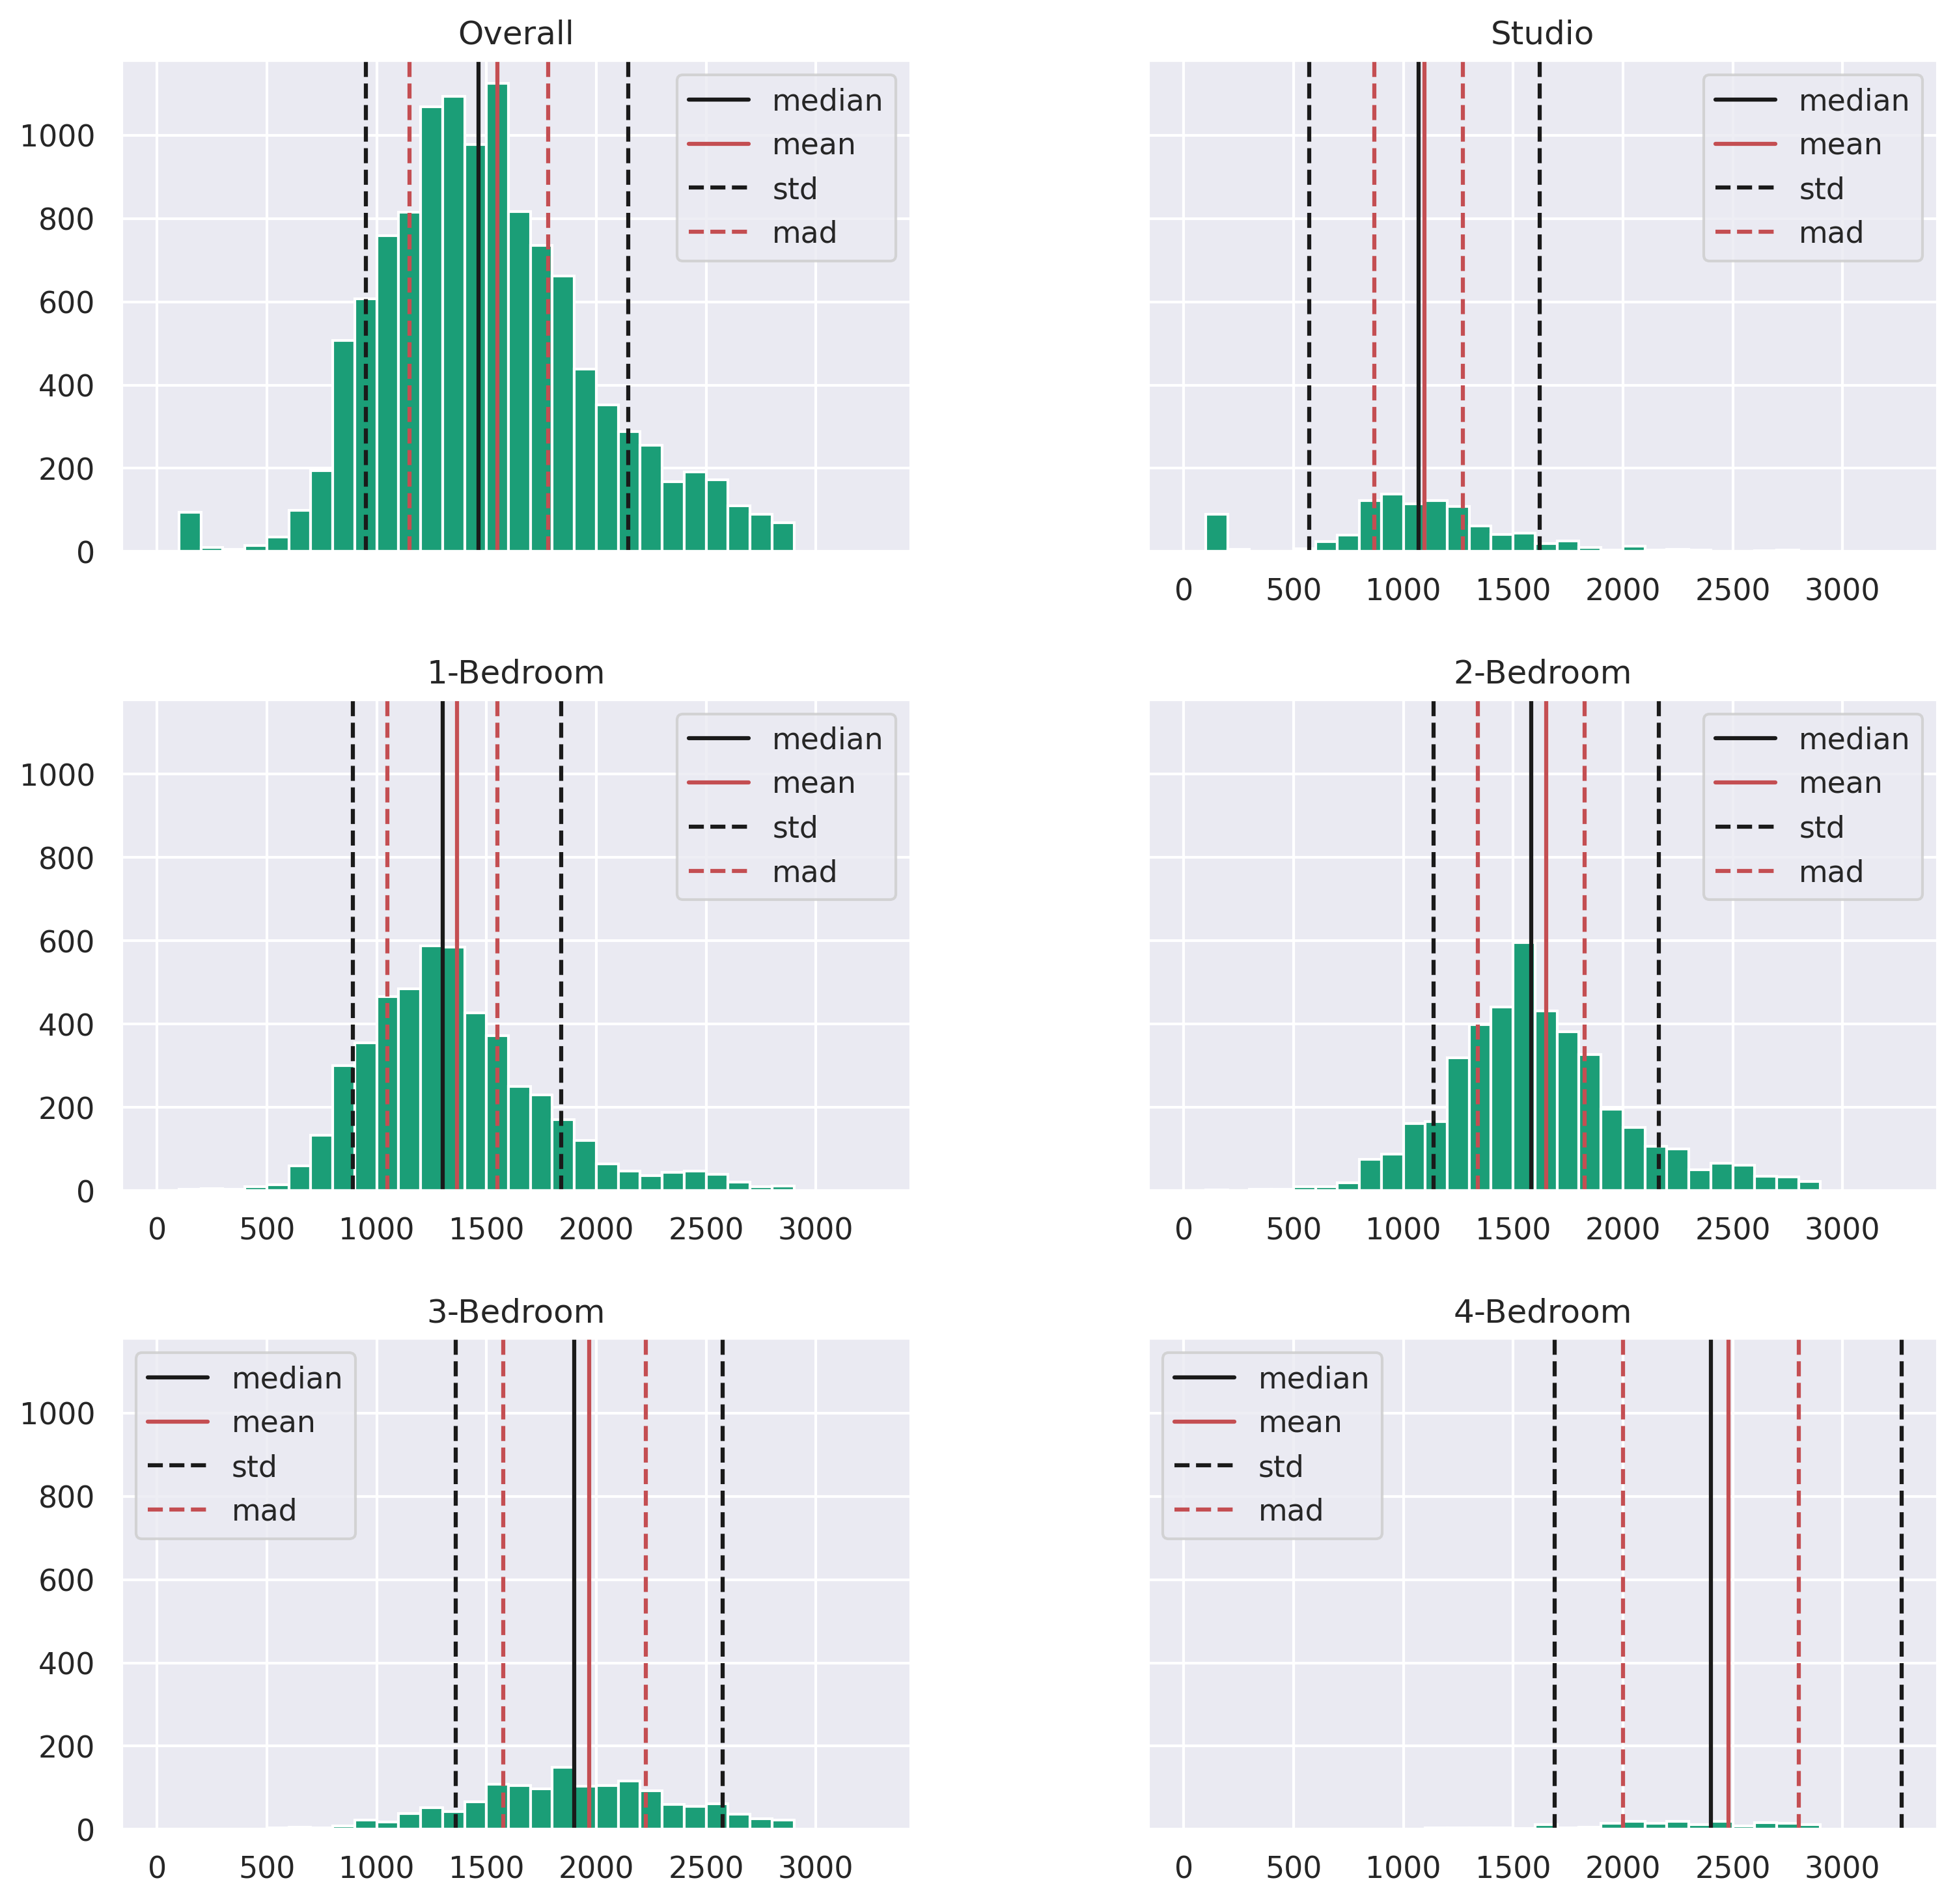

In [11]:
# histograms by number of bedrooms
bins = [100*i for i in range(30)]
fig, axs = plt.subplots(3,2, sharey=True, sharex=True, figsize=(12,12))
df[~df["outlier"]].hist("CurrentRent1", ax=axs[0,0], bins=bins)
axs[0,0].set_title("Overall")
axs[0,0].axvline(df[~df["outlier"]]["CurrentRent1"].median(), linestyle="-", color="k", label="median")
axs[0,0].axvline(df[~df["outlier"]]["CurrentRent1"].mean(), linestyle="-", color="r", label="mean")
# Add lines for std and mad
axs[0,0].axvline(df[~df["outlier"]]["CurrentRent1"].mean() + df[~df["outlier"]]["CurrentRent1"].std(), linestyle="--", color="k", label="std")
axs[0,0].axvline(df[~df["outlier"]]["CurrentRent1"].mean() - df[~df["outlier"]]["CurrentRent1"].std(), linestyle="--", color="k")
axs[0,0].axvline(df[~df["outlier"]]["CurrentRent1"].median() + mad(df[~df["outlier"]]["CurrentRent1"]), linestyle="--", color="r", label="mad")
axs[0,0].axvline(df[~df["outlier"]]["CurrentRent1"].median() - mad(df[~df["outlier"]]["CurrentRent1"]), linestyle="--", color="r")
axs[0,0].legend()
for i in range(0,5):
    ax = axs.flatten()[i+1]
    df[~df["outlier"]][df["nbrBedRms1"] == i].hist("CurrentRent1", ax=ax, bins=bins)
    if i == 0:
        ax.set_title("Studio")
    else:
        ax.set_title(f"{i}-Bedroom")
    ax.axvline(df[~df["outlier"]][df["nbrBedRms1"] == i]["CurrentRent1"].median(), linestyle="-", color="k", label="median")
    ax.axvline(df[~df["outlier"]][df["nbrBedRms1"] == i]["CurrentRent1"].mean(), linestyle="-", color="r", label="mean")
    # Add lines for std and mad
    ax.axvline(df[~df["outlier"]][df["nbrBedRms1"] == i]["CurrentRent1"].mean() + df[~df["outlier"]][df["nbrBedRms1"] == i]["CurrentRent1"].std(), linestyle="--", color="k", label="std")
    ax.axvline(df[~df["outlier"]][df["nbrBedRms1"] == i]["CurrentRent1"].mean() - df[~df["outlier"]][df["nbrBedRms1"] == i]["CurrentRent1"].std(), linestyle="--", color="k")
    ax.axvline(df[~df["outlier"]][df["nbrBedRms1"] == i]["CurrentRent1"].median() + mad(df[~df["outlier"]][df["nbrBedRms1"] == i]["CurrentRent1"]), linestyle="--", color="r", label="mad")
    ax.axvline(df[~df["outlier"]][df["nbrBedRms1"] == i]["CurrentRent1"].median() - mad(df[~df["outlier"]][df["nbrBedRms1"] == i]["CurrentRent1"]), linestyle="--", color="r")
    ax.legend()
    ax.xaxis.set_tick_params(labelbottom=True)

# Overall Rent Statistics (Outliers Removed)

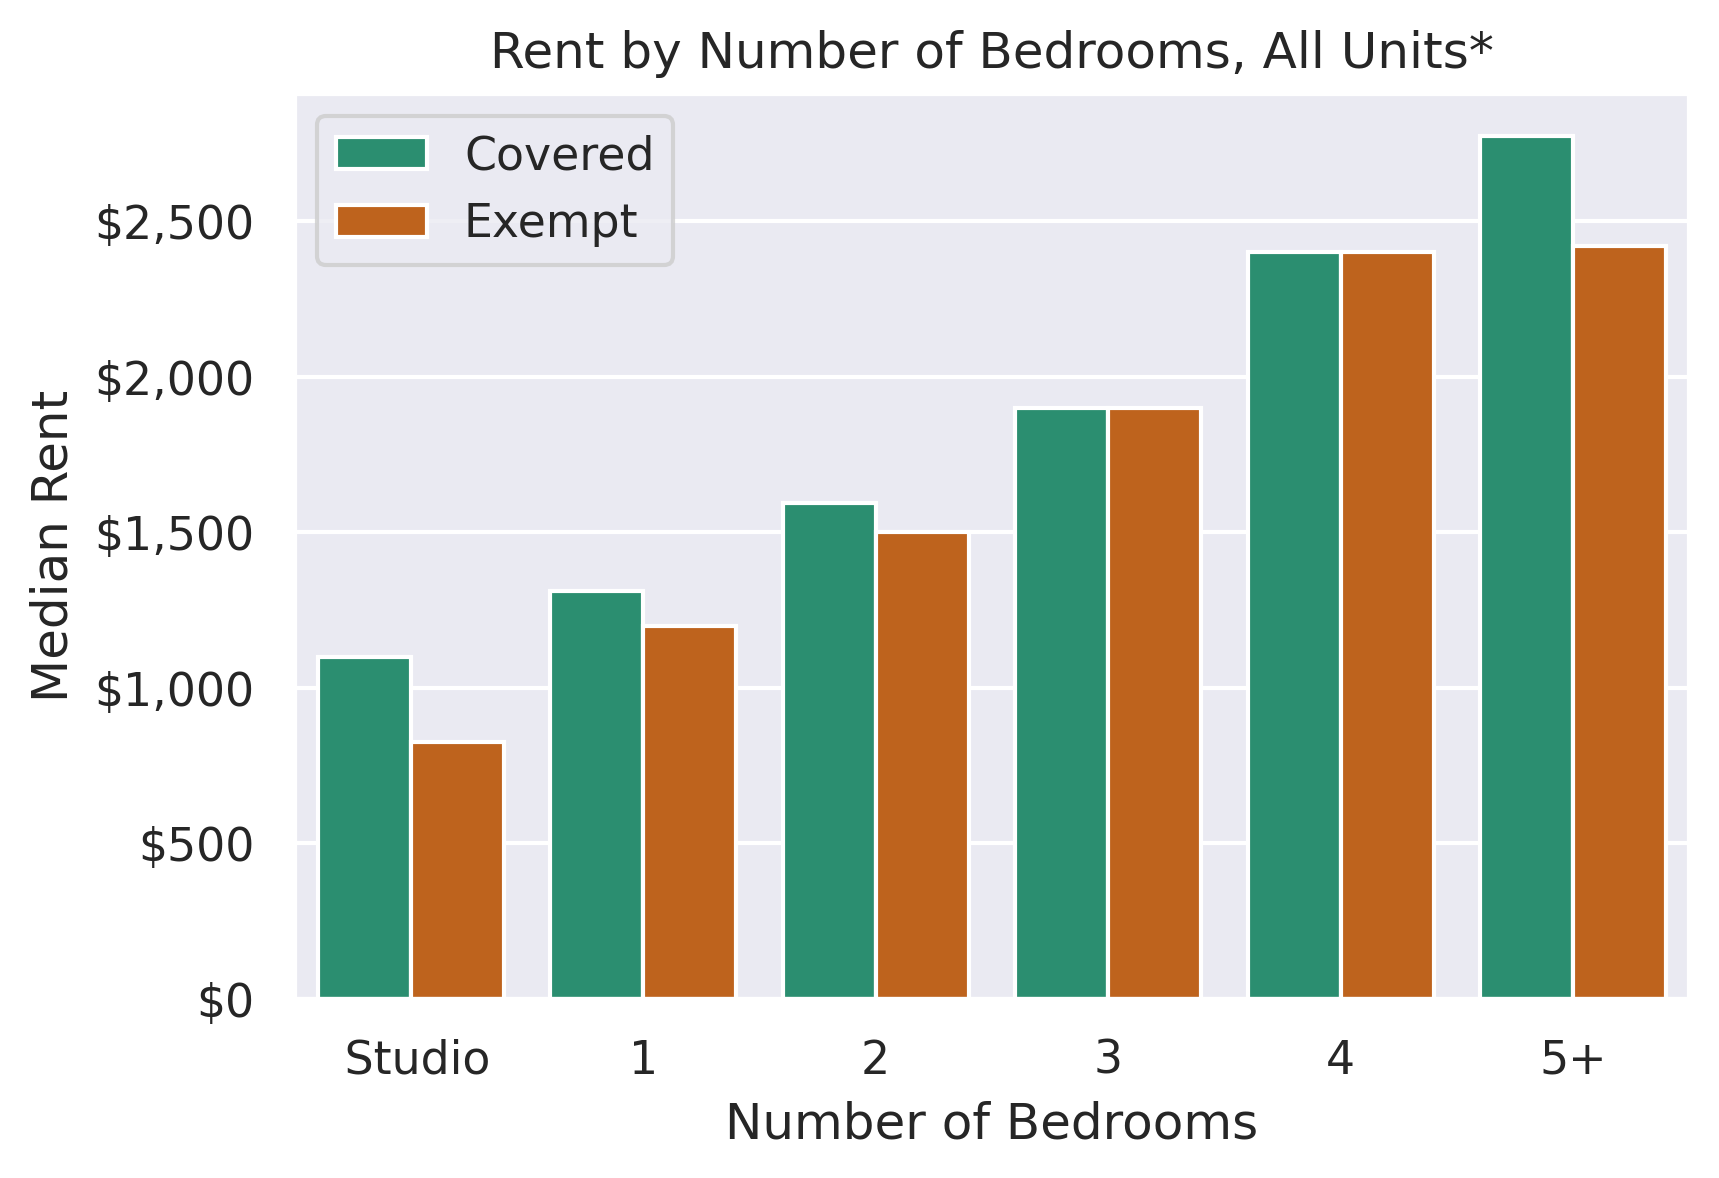

In [12]:
ax = sns.barplot(
    data=df[~df["outlier"]].sort_values("nbrBedRms1"),
    x="nbrBedRms_grouped",
    y="CurrentRent1",
    hue="exempt",
    estimator=np.median,
    errorbar=None,
    )
ax.set_title("Rent by Number of Bedrooms, All Units*")
ax.set_xlabel("Number of Bedrooms")
ax.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: '${:,}'.format(int(x))))
ax.set_ylabel("Median Rent")
handles, labels = ax.get_legend_handles_labels()
ax.legend(title=None, handles=handles, labels=["Covered", "Exempt"])

In [13]:
# median and standard deviation rent by number of bedrooms and exempt status
tab = pd.pivot_table(
    df[~df["outlier"]],
    index="nbrBedRms_grouped",
    columns="exempt",
    values="CurrentRent1",
    aggfunc=[np.median, mad]
    )
tab.columns = tab.columns.set_levels(["Median Rent", "Mean Absolute Deviation"], level=0)
tab.columns = tab.columns.set_levels(["Covered", "Exempt"], level=1)
tab.columns.names = ["", ""]
tab.index.name = "Number of Bedrooms"
tab.style.format("${:,.0f}")

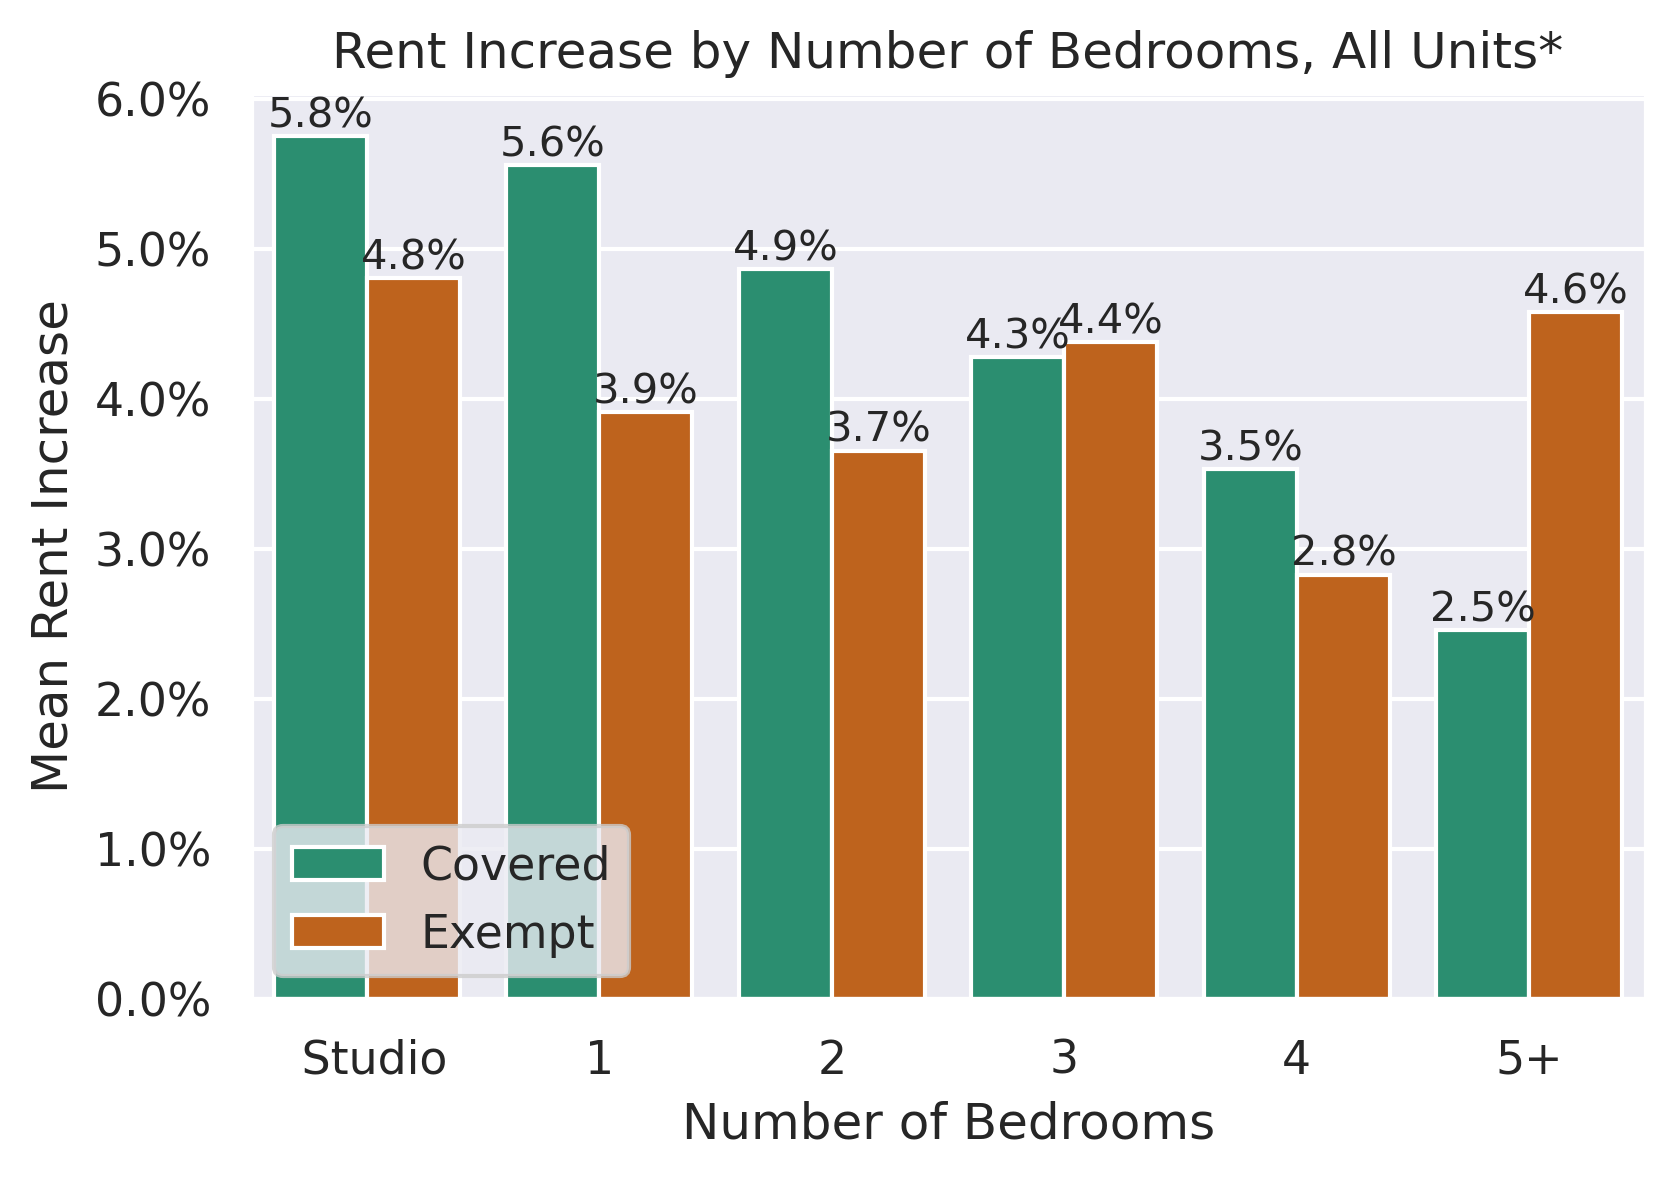

In [14]:
ax = sns.barplot(
    data=df[~df["outlier"]].sort_values("nbrBedRms_grouped"),
    x="nbrBedRms_grouped",
    y="Rent_Inc_percent",
    hue="exempt",
    estimator=np.mean,
    errorbar=None
    )
for bars in ax.containers:
    ax.bar_label(
        bars,
        fmt='%.1f%%',
        label_type='edge'
        )
ax.set_title("Rent Increase by Number of Bedrooms, All Units*")
ax.set_xlabel("Number of Bedrooms")
ax.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: '{:.1f}%'.format(int(x))))
ax.set_ylabel("Mean Rent Increase")
handles, labels = ax.get_legend_handles_labels()
ax.legend(title=None, handles=handles, labels=["Covered", "Exempt"], loc='lower left')

In [15]:
# mean rent increase (percent) by number of bedrooms and exempt status
tab = pd.pivot_table(
    df[~df["outlier"]],
    index="nbrBedRms_grouped",
    columns="exempt",
    values="Rent_Inc_percent",
    aggfunc=np.mean
    )
tab.columns = ["Covered", "Exempt"]
tab.index.name = "Number of Bedrooms"
tab.style.format("{:.1f}%")

,Covered,Exempt
Number of Bedrooms,,
Studio,5.8%,4.8%
1,5.6%,3.9%
2,4.9%,3.7%
3,4.3%,4.4%
4,3.5%,2.8%
5+,2.5%,4.6%


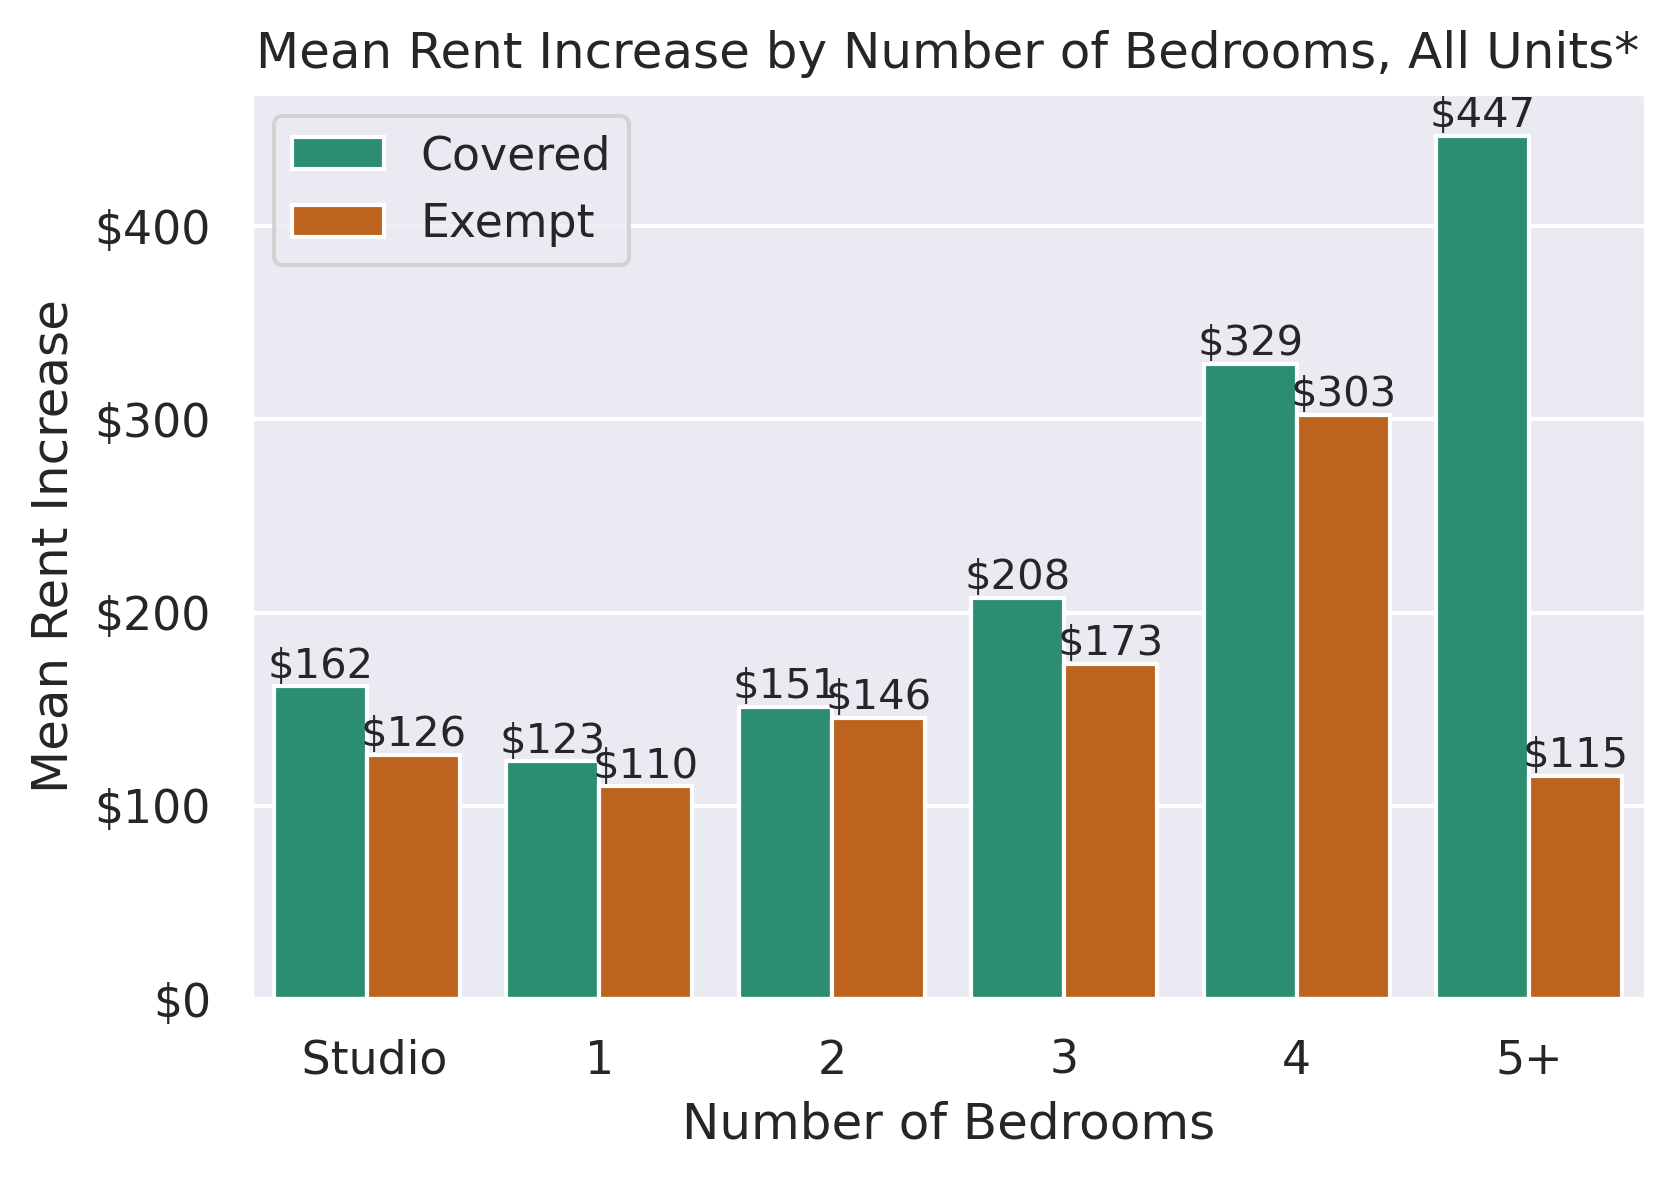

In [16]:
ax = sns.barplot(
    data=df[~df["outlier"]].sort_values("nbrBedRms_grouped"),
    x="nbrBedRms_grouped",
    y="Rent_Inc",
    hue="exempt",
    estimator=np.mean,
    errorbar=None
    )
for bars in ax.containers:
    ax.bar_label(
        bars,
        fmt='$%.0f',
        label_type='edge'
        )
ax.set_title("Mean Rent Increase by Number of Bedrooms, All Units*")
ax.set_xlabel("Number of Bedrooms")
ax.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: '${:,.0f}'.format(int(x))))
ax.set_ylabel("Mean Rent Increase")
handles, labels = ax.get_legend_handles_labels()
ax.legend(title=None, handles=handles, labels=["Covered", "Exempt"])

In [17]:
# mean rent increase (dollars) by number of bedrooms and exempt status
tab = pd.pivot_table(
    df[~df["outlier"]],
    index="nbrBedRms_grouped",
    columns="exempt",
    values="Rent_Inc",
    aggfunc=np.mean
    )
tab.columns = ["Covered", "Exempt"]
tab.index.name = "Number of Bedrooms"
tab.style.format("${:,.0f}")

,Covered,Exempt
Number of Bedrooms,,
Studio,$162,$126
1,$123,$110
2,$151,$146
3,$208,$173
4,$329,$303
5+,$447,$115


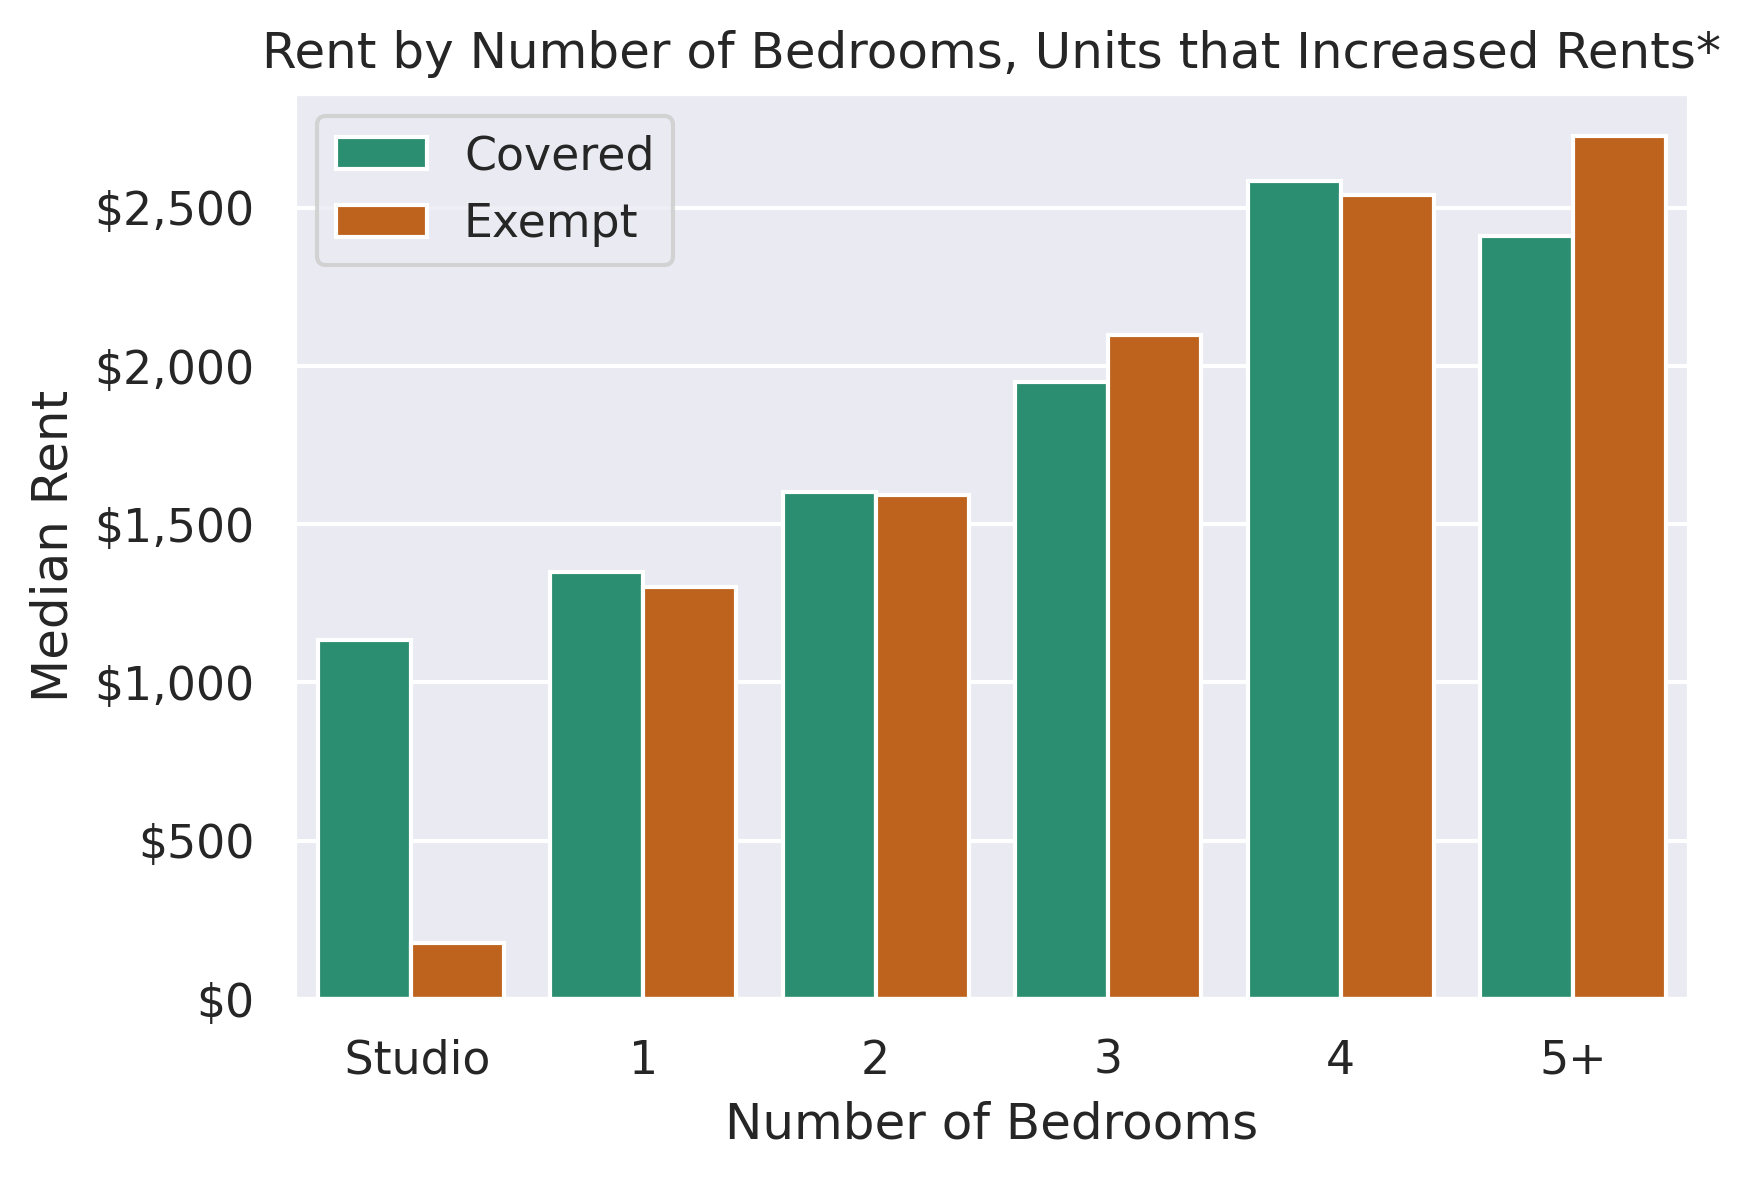

In [18]:
ax = sns.barplot(
    data=df[~df["outlier"] & (df["Rent_Inc"] > 0)].sort_values("nbrBedRms_grouped"),
    x="nbrBedRms_grouped",
    y="CurrentRent1",
    hue="exempt",
    estimator=np.median,
    errorbar=None
    )
ax.set_title("Rent by Number of Bedrooms, Units that Increased Rents*")
ax.set_xlabel("Number of Bedrooms")
ax.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: '${:,}'.format(int(x))))
ax.set_ylabel("Median Rent")
handles, labels = ax.get_legend_handles_labels()
ax.legend(title=None, handles=handles, labels=["Covered", "Exempt"])

In [19]:
# median and standard deviation rent by number of bedrooms and exempt status, only units that increased rents
tab = pd.pivot_table(
    df[~df["outlier"] & (df["Rent_Inc"] > 0)],
    index="nbrBedRms_grouped",
    columns="exempt",
    values="CurrentRent1",
    aggfunc=[np.median, mad]
    )
tab.columns = tab.columns.set_levels(["Median Rent", "Mean Absolute Deviation"], level=0)
tab.columns = tab.columns.set_levels(["Covered", "Exempt"], level=1)
tab.columns.names = ["", ""]
tab.index.name = "Number of Bedrooms"
tab.style.format("${:,.0f}")

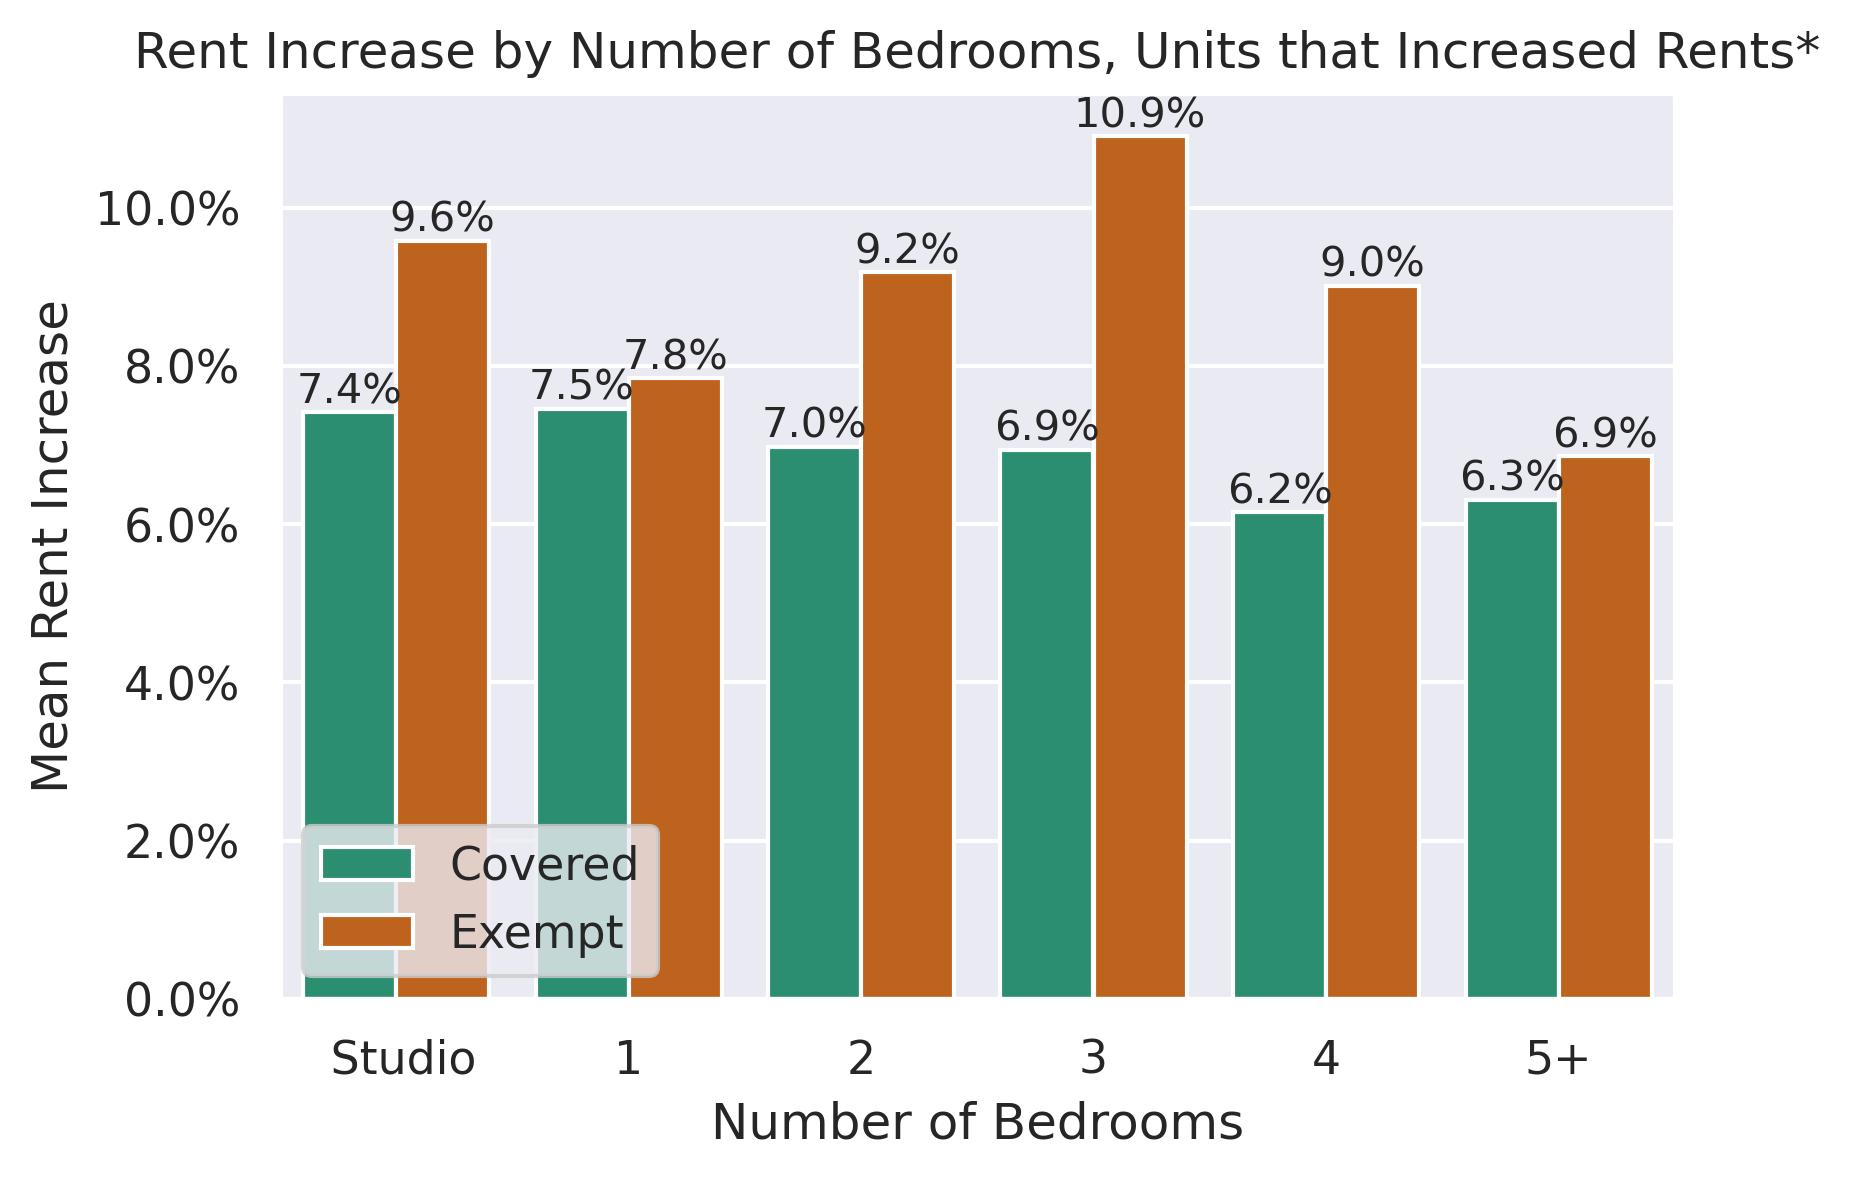

In [20]:
ax = sns.barplot(
    data=df[~df["outlier"] & (df["Rent_Inc"] > 0)].sort_values("nbrBedRms_grouped"),
    x="nbrBedRms_grouped",
    y="Rent_Inc_percent",
    hue="exempt",
    estimator=np.mean,
    errorbar=None
    )
for bars in ax.containers:
    ax.bar_label(
        bars,
        fmt='%.1f%%',
        label_type='edge'
        )
ax.set_title("Rent Increase by Number of Bedrooms, Units that Increased Rents*")
ax.set_xlabel("Number of Bedrooms")
ax.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: '{:.1f}%'.format(int(x))))
ax.set_ylabel("Mean Rent Increase")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=["Covered", "Exempt"], loc='lower left')

In [21]:
# mean rent increase by number of bedrooms and exempt status, only units that increased rents
tab = pd.pivot_table(
    df[~df["outlier"] & (df["Rent_Inc"] > 0)],
    index="nbrBedRms_grouped",
    columns="exempt",
    values="Rent_Inc_percent",
    aggfunc=np.mean
    )
tab.columns = ["Covered", "Exempt"]
tab.index.name = "Number of Bedrooms"
tab.style.format("{:.1f}%")

,Covered,Exempt
Number of Bedrooms,,
Studio,7.4%,9.6%
1,7.5%,7.8%
2,7.0%,9.2%
3,6.9%,10.9%
4,6.2%,9.0%
5+,6.3%,6.9%


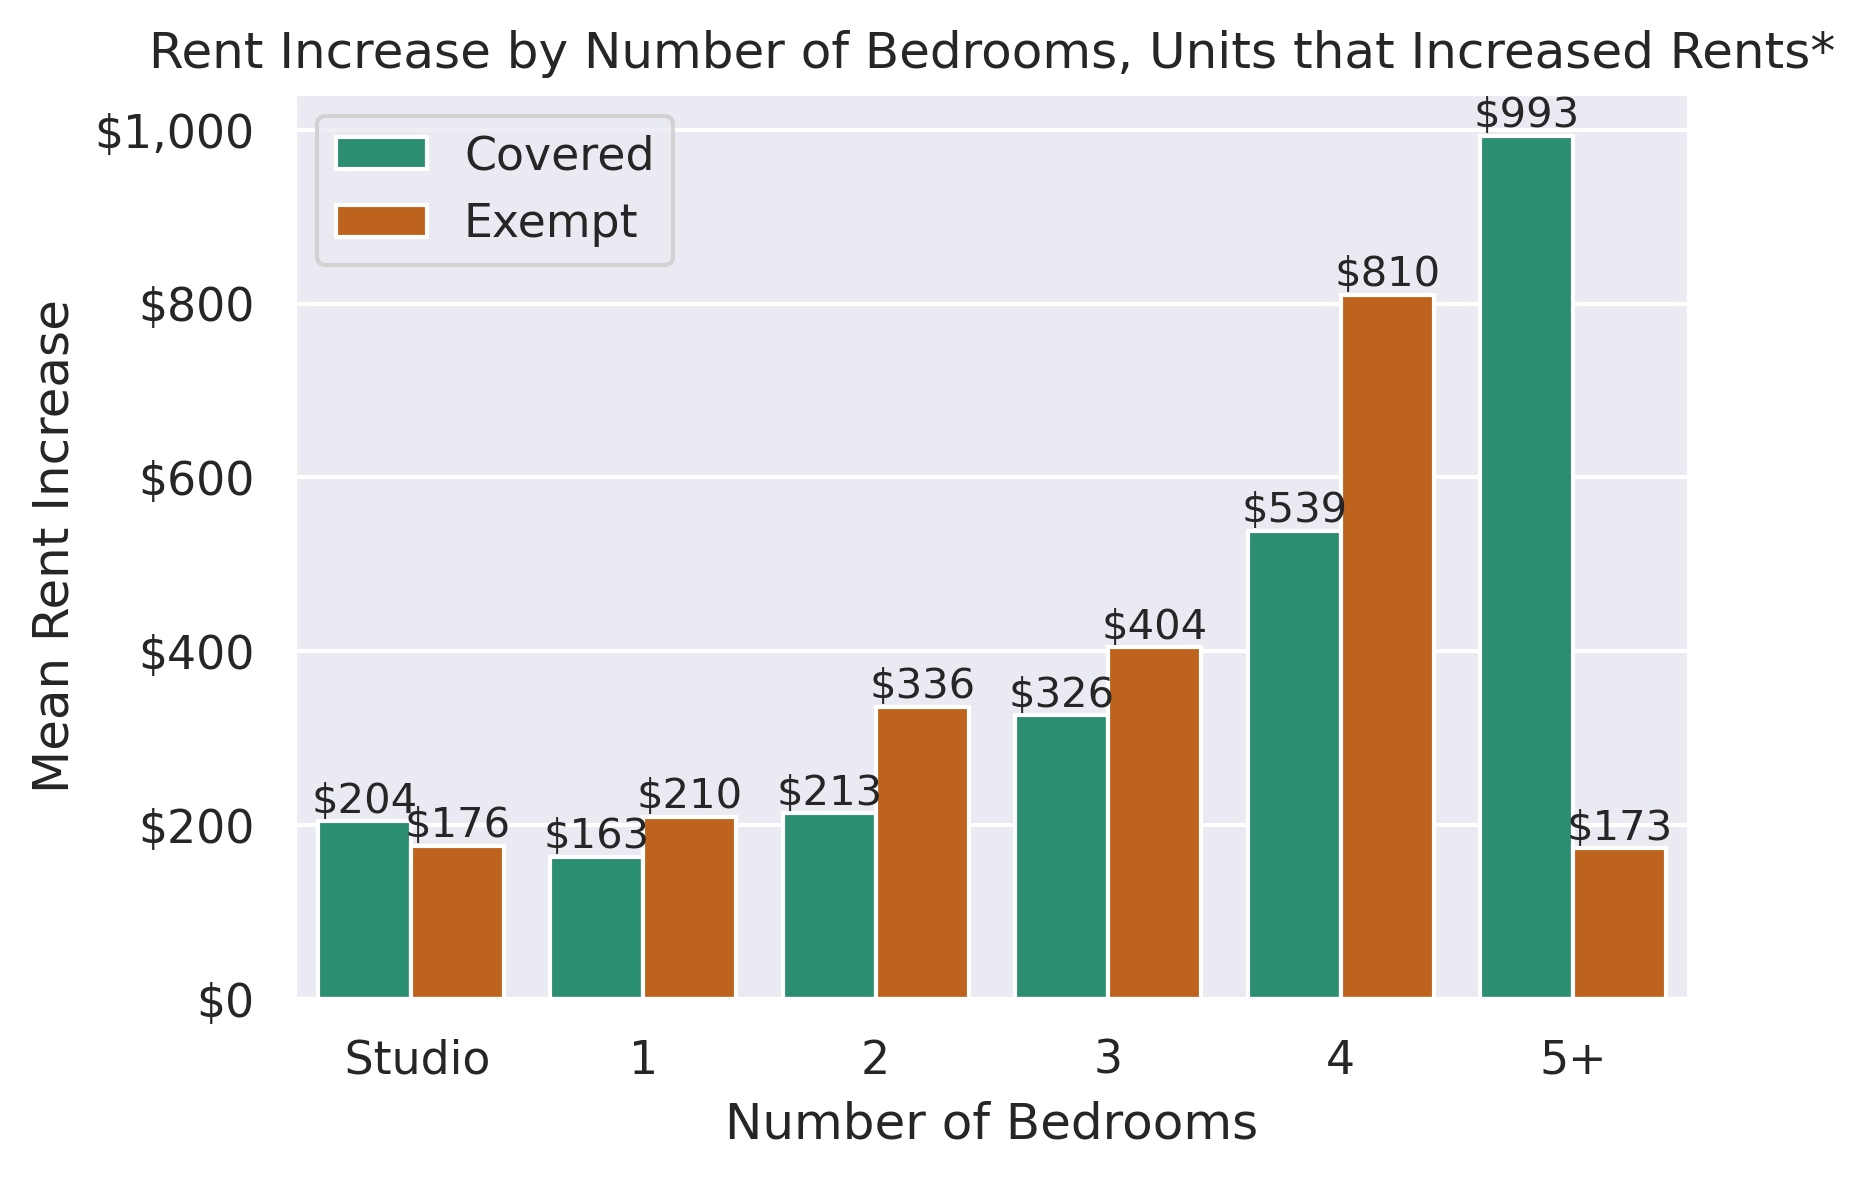

In [22]:
ax = sns.barplot(
    data=df[~df["outlier"] & (df["Rent_Inc"] > 0)].sort_values("nbrBedRms_grouped"),
    x="nbrBedRms_grouped",
    y="Rent_Inc",
    hue="exempt",
    estimator=np.mean,
    errorbar=None
    )
for bars in ax.containers:
    ax.bar_label(
        bars,
        fmt='$%.0f',
        label_type='edge'
        )
ax.set_title("Rent Increase by Number of Bedrooms, Units that Increased Rents*")
ax.set_xlabel("Number of Bedrooms")
ax.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: '${:,.0f}'.format(int(x))))
ax.set_ylabel("Mean Rent Increase")
handles, labels = ax.get_legend_handles_labels()
ax.legend(title=None, handles=handles, labels=["Covered", "Exempt"])

In [23]:
# mean rent increase (dollars) by number of bedrooms and exempt status, only units that increased rents
tab = pd.pivot_table(
    df[~df["outlier"] & (df["Rent_Inc"] > 0)],
    index="nbrBedRms_grouped",
    columns="exempt",
    values="Rent_Inc",
    aggfunc=np.mean
    )
tab.columns = ["Covered", "Exempt"]
tab.index.name = "Number of Bedrooms"
tab.style.format("${:,.0f}")

,Covered,Exempt
Number of Bedrooms,,
Studio,$204,$176
1,$163,$210
2,$213,$336
3,$326,$404
4,$539,$810
5+,$993,$173


# Overall Rent Statistics (Outliers Included)
Code for these charts is included for completeness only and should not be used in subsequent analysis.

In [ ]:
ax = sns.barplot(
    data=df.sort_values("nbrBedRms_grouped"),
    x="nbrBedRms_grouped",
    y="CurrentRent1",
    hue="exempt"
    )
ax.set_title("Rents by Number of Bedrooms, All Registered Units")

In [ ]:
ax = sns.barplot(
    data=df.sort_values("nbrBedRms_grouped"),
    x="nbrBedRms_grouped",
    y="Rent_Inc_percent",
    hue="exempt"
    )
ax.set_title("Rent Increase Percentages by Number of Bedrooms, All Registered Units")

In [ ]:
ax = sns.barplot(
    data=df[df["Rent_Inc"] > 0].sort_values("nbrBedRms_grouped"),
    x="nbrBedRms_grouped",
    y="CurrentRent1",
    hue="exempt"
    )
ax.set_title("Rents by Number of Bedrooms, Only Units that Increased Rents")

In [ ]:
ax = sns.barplot(
    data=df[(df["Rent_Inc"] > 0)].sort_values("nbrBedRms_grouped"),
    x="nbrBedRms_grouped",
    y="Rent_Inc_percent",
    hue="exempt"
    )
ax.set_title("Rents Increase Percentages by Number of Bedrooms, Only Units that Increased Rents")